In [48]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt



In [22]:
df = pd.read_csv('../data/processed/cleaned_data.csv')


In [24]:
df['Order Date'] = pd.to_datetime(df['Order.Date'])
df['Ship Date'] = pd.to_datetime(df['Ship.Date'])

In [ ]:


# Business KPIs
print(f"Total Sales: ${df['Sales'].sum():,.2f}")
print(f"Total Profit: ${df['Profit'].sum():,.2f}")
print(f"Orders: {len(df)}")
print(f"Avg Order Value: ${df['Sales'].mean():.2f}")
print(f"Overall Profit Margin: {(df['Profit'].sum()/df['Sales'].sum())*100:.2f}%")
print(f"Unique Customers: {df['Customer.ID'].nunique():,}")
print(f"Unique Products: {df['Product.ID'].nunique():,}")



Total Sales: $12,642,905.00
Total Profit: $1,467,457.29
Orders: 51290
Avg Order Value: $246.50
Overall Profit Margin: 11.61%
Unique Customers: 4,873
Unique Products: 10,292
Overall Profit Margin: 11.61%


In [26]:
yearly_performance = df.groupby('Year').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order Date': 'count'
}).round(2)
yearly_performance.columns = ['Total_Sales', 'Total_Profit', 'Order_Count']
yearly_performance['Profit_Margin'] = (yearly_performance['Total_Profit'] / yearly_performance['Total_Sales']) * 100
yearly_performance

,Total_Sales,Total_Profit,Order_Count,Profit_Margin
Year,,,,
2011,2259511,248940.81,8998,11.017464
2012,2677493,307415.28,10962,11.481460
2013,3405860,406935.23,13799,11.948090
2014,4300041,504165.97,17531,11.724678


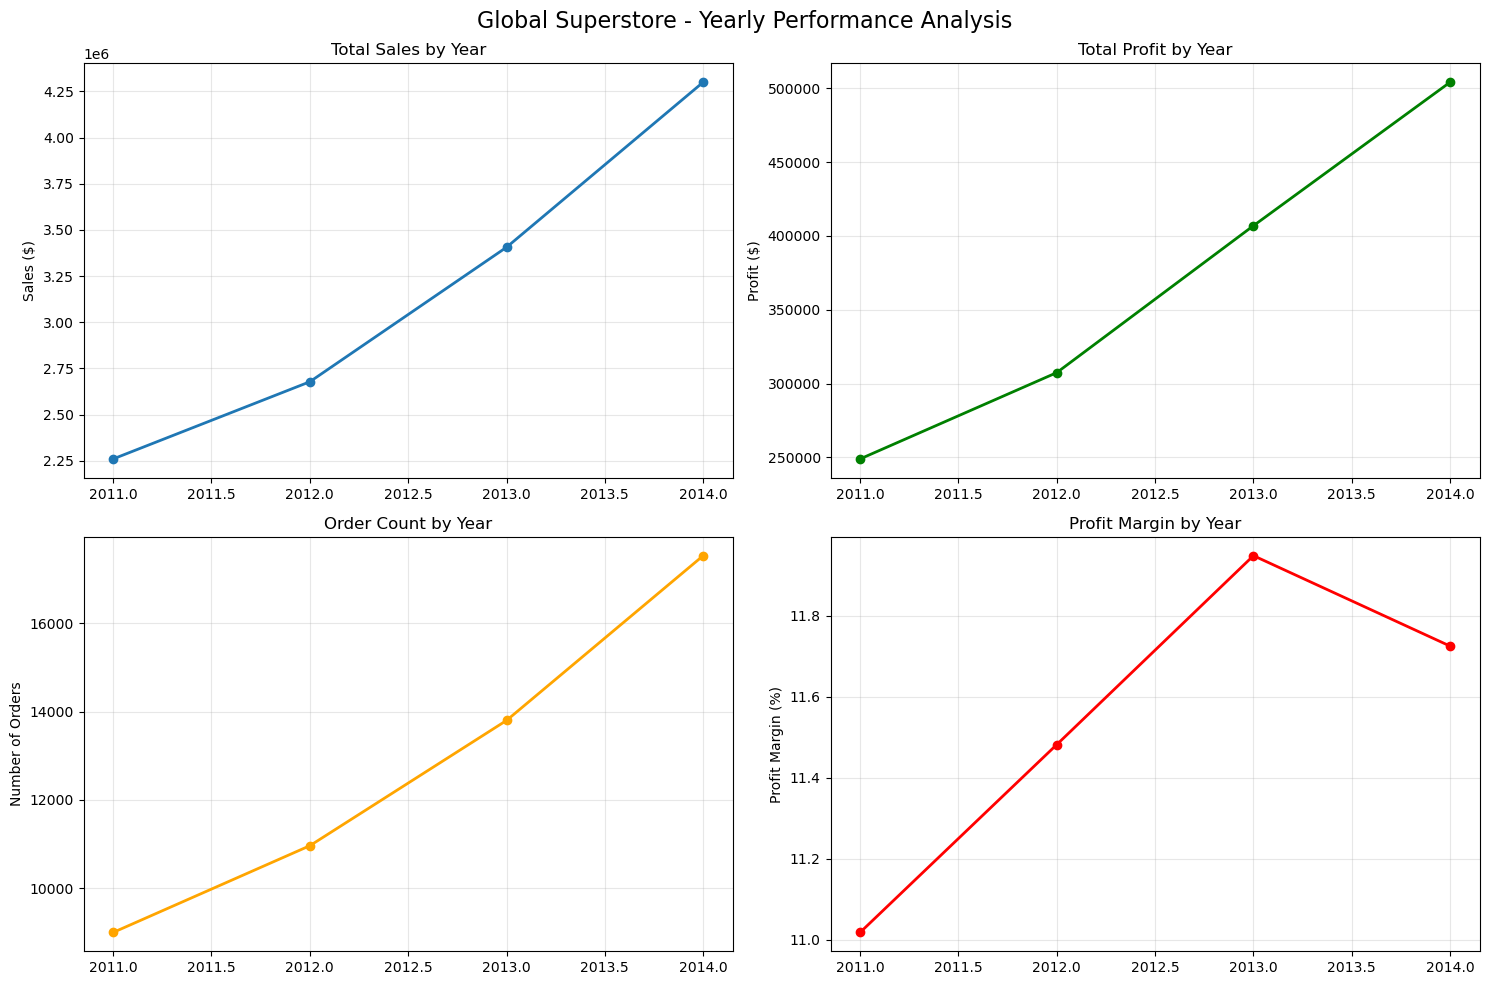

In [50]:
# Visualize yearly trends
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Global Superstore - Yearly Performance Analysis', fontsize=16)

# Sales trend
axes[0,0].plot(yearly_performance.index, yearly_performance['Total_Sales'], marker='o', linewidth=2)
axes[0,0].set_title('Total Sales by Year')
axes[0,0].set_ylabel('Sales ($)')
axes[0,0].grid(True, alpha=0.3)

# Profit trend
axes[0,1].plot(yearly_performance.index, yearly_performance['Total_Profit'], marker='o', color='green', linewidth=2)
axes[0,1].set_title('Total Profit by Year')
axes[0,1].set_ylabel('Profit ($)')
axes[0,1].grid(True, alpha=0.3)

# Order count trend
axes[1,0].plot(yearly_performance.index, yearly_performance['Order_Count'], marker='o', color='orange', linewidth=2)
axes[1,0].set_title('Order Count by Year')
axes[1,0].set_ylabel('Number of Orders')
axes[1,0].grid(True, alpha=0.3)

# Profit margin trend
axes[1,1].plot(yearly_performance.index, yearly_performance['Profit_Margin'], marker='o', color='red', linewidth=2)
axes[1,1].set_title('Profit Margin by Year')
axes[1,1].set_ylabel('Profit Margin (%)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [13]:
# region = df.groupby('Region').agg({'Sales':'sum', 'Profit':'sum'})

regional_performance = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order Date': 'count'
}).round(2)
regional_performance.columns = ['Total_Sales', 'Total_Profit', 'Order_Count']
regional_performance['Profit_Margin'] = (regional_performance['Total_Profit'] / regional_performance['Total_Sales']) * 100
print("REGIONAL PERFORMANCE:")

regional_performance.sort_values('Total_Sales', ascending=False)

REGIONAL PERFORMANCE:


,Total_Sales,Total_Profit,Order_Count,Profit_Margin
Region,,,,
Central,2822399,311403.98,11117,11.033308
South,1600960,140355.77,6645,8.766975
North,1248192,194597.95,4785,15.590386
Oceania,1100207,120089.11,3487,10.915138
Southeast Asia,884438,17852.33,3129,2.018494
North Asia,848349,165578.42,2338,19.517724
EMEA,806184,43897.97,5029,5.445155
Africa,783776,88871.63,4587,11.338907
Central Asia,752839,132480.19,2048,17.597413


In [ ]:
# category = df.groupby('Category').agg({'Sales':'sum', 'Profit':'sum'})

category_performance = df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).round(2)
category_performance.columns = ['Total_Sales', 'Total_Profit', 'Total_Quantity']
category_performance['Profit_Margin'] = (category_performance['Total_Profit'] / category_performance['Total_Sales']) * 100

print("CATEGORY PERFORMANCE:")
print(category_performance.sort_values('Total_Sales', ascending=False))

CATEGORY PERFORMANCE:
                 Total_Sales  Total_Profit  Total_Quantity  Profit_Margin
Category                                                                 
Technology           4744691     663778.73           35176      13.989925
Furniture            4110884     285204.72           34954       6.937795
Office Supplies      3787330     518473.83          108182      13.689692


In [17]:
# segment = df.groupby('Segment').agg({'Sales':'sum', 'Profit':'sum'})

segment_performance = df.groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order Date': 'count'
}).round(2)
segment_performance.columns = ['Total_Sales', 'Total_Profit', 'Order_Count']
segment_performance['Profit_Margin'] = (segment_performance['Total_Profit'] / segment_performance['Total_Sales']) * 100

print("CUSTOMER SEGMENT ANALYSIS:")
print(segment_performance.sort_values('Total_Sales', ascending=False))

CUSTOMER SEGMENT ANALYSIS:
             Total_Sales  Total_Profit  Order_Count  Profit_Margin
Segment                                                           
Consumer         6508141     749239.78        26518      11.512347
Corporate        3824808     441208.33        15429      11.535437
Home Office      2309956     277009.18         9343      11.991968


In [28]:
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,è®°å½æ°,Order.Date,Order.ID,...,Month,Quarter,Profit_Margin,Shipping_Time,Day_of_Week,Month_Name,Discount_Amount,Revenue_per_Quantity,Order Date,Ship Date
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07,CA-2011-130813,...,1,1,49.111579,2,4,January,0.0,6.333333,2011-01-07,2011-01-09
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21,CA-2011-148614,...,1,1,48.909474,5,4,January,0.0,9.500000,2011-01-21,2011-01-26
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05,CA-2011-118962,...,8,3,46.865714,4,4,August,0.0,7.000000,2011-08-05,2011-08-09
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05,CA-2011-118962,...,8,3,47.982703,4,4,August,0.0,55.500000,2011-08-05,2011-08-09
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29,CA-2011-146969,...,9,3,51.840000,4,3,September,0.0,6.000000,2011-09-29,2011-10-03


In [31]:
# Create categorical features
df['Profit_Category'] = pd.cut(df['Profit'], 
                              bins=[-float('inf'), 0, 100, 500, float('inf')],
                              labels=['Loss', 'Low_Profit', 'Medium_Profit', 'High_Profit'])

df['Sales_Category'] = pd.cut(df['Sales'], 
                             bins=[0, 100, 500, 1000, 5000, float('inf')],
                             labels=['Very_Low', 'Low', 'Medium', 'High', 'Very_High'])


In [40]:
# Group customer metrics
customer_metrics = df.groupby('Customer.ID').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Order_Count=('Order Date', 'count'),
    Last_Order=('Order Date', 'max')
).round(2)


In [41]:
# Calculate additional KPIs
customer_metrics['Avg_Order_Value'] = customer_metrics['Total_Sales'] / customer_metrics['Order_Count']
customer_metrics['Profit_per_Order'] = customer_metrics['Total_Profit'] / customer_metrics['Order_Count']


In [42]:
# RFM Metrics
customer_metrics['Recency'] = (df['Order Date'].max() - customer_metrics['Last_Order']).dt.days
customer_metrics['Frequency'] = customer_metrics['Order_Count']
customer_metrics['Monetary'] = customer_metrics['Total_Sales']

In [43]:
customer_metrics.head()

,Total_Sales,Total_Profit,Order_Count,Last_Order,Avg_Order_Value,Profit_per_Order,Recency,Frequency,Monetary
Customer.ID,,,,,,,,,
AA-103151,1445,12.88,10,2014-12-23,144.500000,1.288000,8,10,1445
AA-103152,6105,568.74,16,2014-12-18,381.562500,35.546250,13,16,6105
AA-103153,633,228.96,5,2013-02-05,126.600000,45.792000,694,5,633
AA-103154,5565,-362.88,11,2014-06-30,505.909091,-32.989091,184,11,5565
AA-103751,2407,577.93,9,2014-12-25,267.444444,64.214444,6,9,2407
